This is the section for the group project proposal for group 9!

Here is the link to the data set we will be using, Online News Populartiy from the UCI Machine Learning Resprotory.
Subsiquent sources can be found in the link on the UCI web page.
Link: https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity

Quesiton: Are we able to use previous articles to predict the number of shares an article recived.

In the cell below We will be importing all of the packages to help with our project!

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In the cell below, we will be reading our data into R.

In [2]:
getwd()

[1] "/home/jovyan/DCSI-100-Group-9-Project/project_proposal"

In [3]:
popularity<-read_csv("../data/OnlineNewsPopularity.csv")
head(popularity)

Rows: 39644 Columns: 61
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): url
dbl (60): timedelta, n_tokens_title, n_tokens_content, n_unique_tokens, n_no...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,⋯,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
http://mashable.com/2013/01/07/amazon-instant-video-browser/,731,12,219,0.6635945,1,0.8153846,4,2,1,⋯,0.10000000,0.7,-0.3500000,-0.600,-0.2000000,0.5000000,-0.1875000,0.00000000,0.1875000,593
http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/,731,9,255,0.6047431,1,0.7919463,3,1,1,⋯,0.03333333,0.7,-0.1187500,-0.125,-0.1000000,0.0000000,0.0000000,0.50000000,0.0000000,711
http://mashable.com/2013/01/07/apple-40-billion-app-downloads/,731,9,211,0.5751295,1,0.6638655,3,1,1,⋯,0.10000000,1.0,-0.4666667,-0.800,-0.1333333,0.0000000,0.0000000,0.50000000,0.0000000,1500
http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/,731,9,531,0.5037879,1,0.6656347,9,0,1,⋯,0.13636364,0.8,-0.3696970,-0.600,-0.1666667,0.0000000,0.0000000,0.50000000,0.0000000,1200
http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.4156456,1,0.5408895,19,19,20,⋯,0.03333333,1.0,-0.2201923,-0.500,-0.0500000,0.4545455,0.1363636,0.04545455,0.1363636,505
http://mashable.com/2013/01/07/beewi-smart-toys/,731,10,370,0.5598886,1,0.6981982,2,2,0,⋯,0.13636364,0.6,-0.1950000,-0.400,-0.1000000,0.6428571,0.2142857,0.14285714,0.2142857,855


The next lines of Code will be used for wragling the data. I will be combining columns as well as removing extraneous columns I dont feel we need for this analysis. 

In [4]:

popularity_tidy <- popularity |> 
#removing columns that are specifically not litsted as predictors as well as columns that self reference articles.
select(-url, -timedelta , - num_self_hrefs, -self_reference_min_shares:-self_reference_avg_sharess,
      -is_weekend, -kw_min_min:-kw_avg_avg, -LDA_00:-LDA_04, -global_subjectivity:-abs_title_sentiment_polarity,
      -n_non_stop_words,-n_non_stop_unique_tokens, -data_channel_is_lifestyle:-weekday_is_sunday, -num_keywords) 


glimpse(popularity_tidy)


Rows: 39,644
Columns: 8
$ n_tokens_title       <dbl> 12, 9, 9, 9, 13, 10, 8, 12, 11, 10, 9, 10, 9, 9, …
$ n_tokens_content     <dbl> 219, 255, 211, 531, 1072, 370, 960, 989, 97, 231,…
$ n_unique_tokens      <dbl> 0.6635945, 0.6047431, 0.5751295, 0.5037879, 0.415…
$ num_hrefs            <dbl> 4, 3, 3, 9, 19, 2, 21, 20, 2, 4, 11, 7, 18, 4, 19…
$ num_imgs             <dbl> 1, 1, 1, 1, 20, 0, 20, 20, 0, 1, 1, 1, 11, 0, 9, …
$ num_videos           <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 21, 0, 0, …
$ average_token_length <dbl> 4.680365, 4.913725, 4.393365, 4.404896, 4.682836,…
$ shares               <dbl> 593, 711, 1500, 1200, 505, 855, 556, 891, 3600, 7…


In [5]:
#Splitting the data into training and testing data
#Strata = the day the article was published
popularity_split<- initial_split(popularity_tidy, prop = .75, strata = shares)
popularity_train<- training(popularity_split)
popularity_test <- testing(popularity_split)


In [6]:
#Initial exploration table
#Found the mean values of each of our predictors
initial_table <- popularity_train |>
map_df(mean)
initial_table

n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_imgs,num_videos,average_token_length,shares
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
10.40256,549.7639,0.5536697,10.88094,4.548365,1.25787,4.549686,3420.964


Warning message:
“Removed 327 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1 rows containing missing values (geom_bar).”


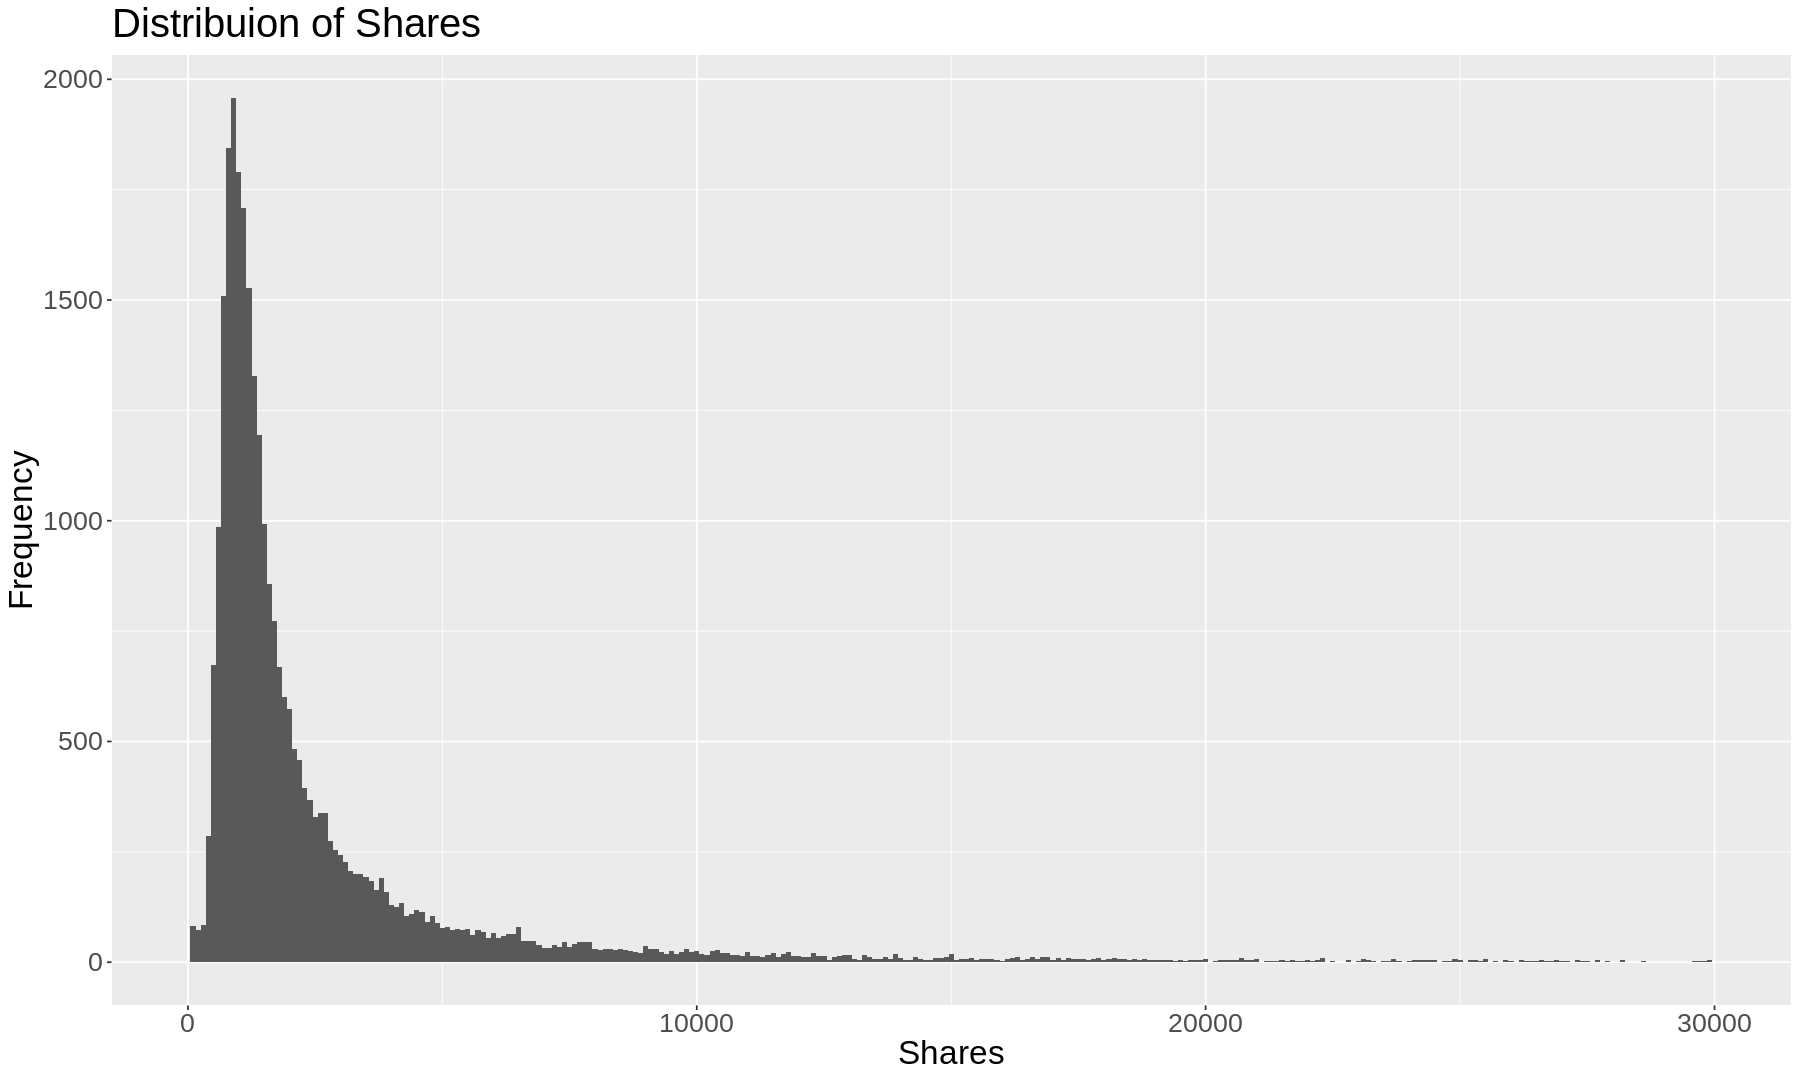

Warning message:
“Removed 2 rows containing missing values (geom_bar).”


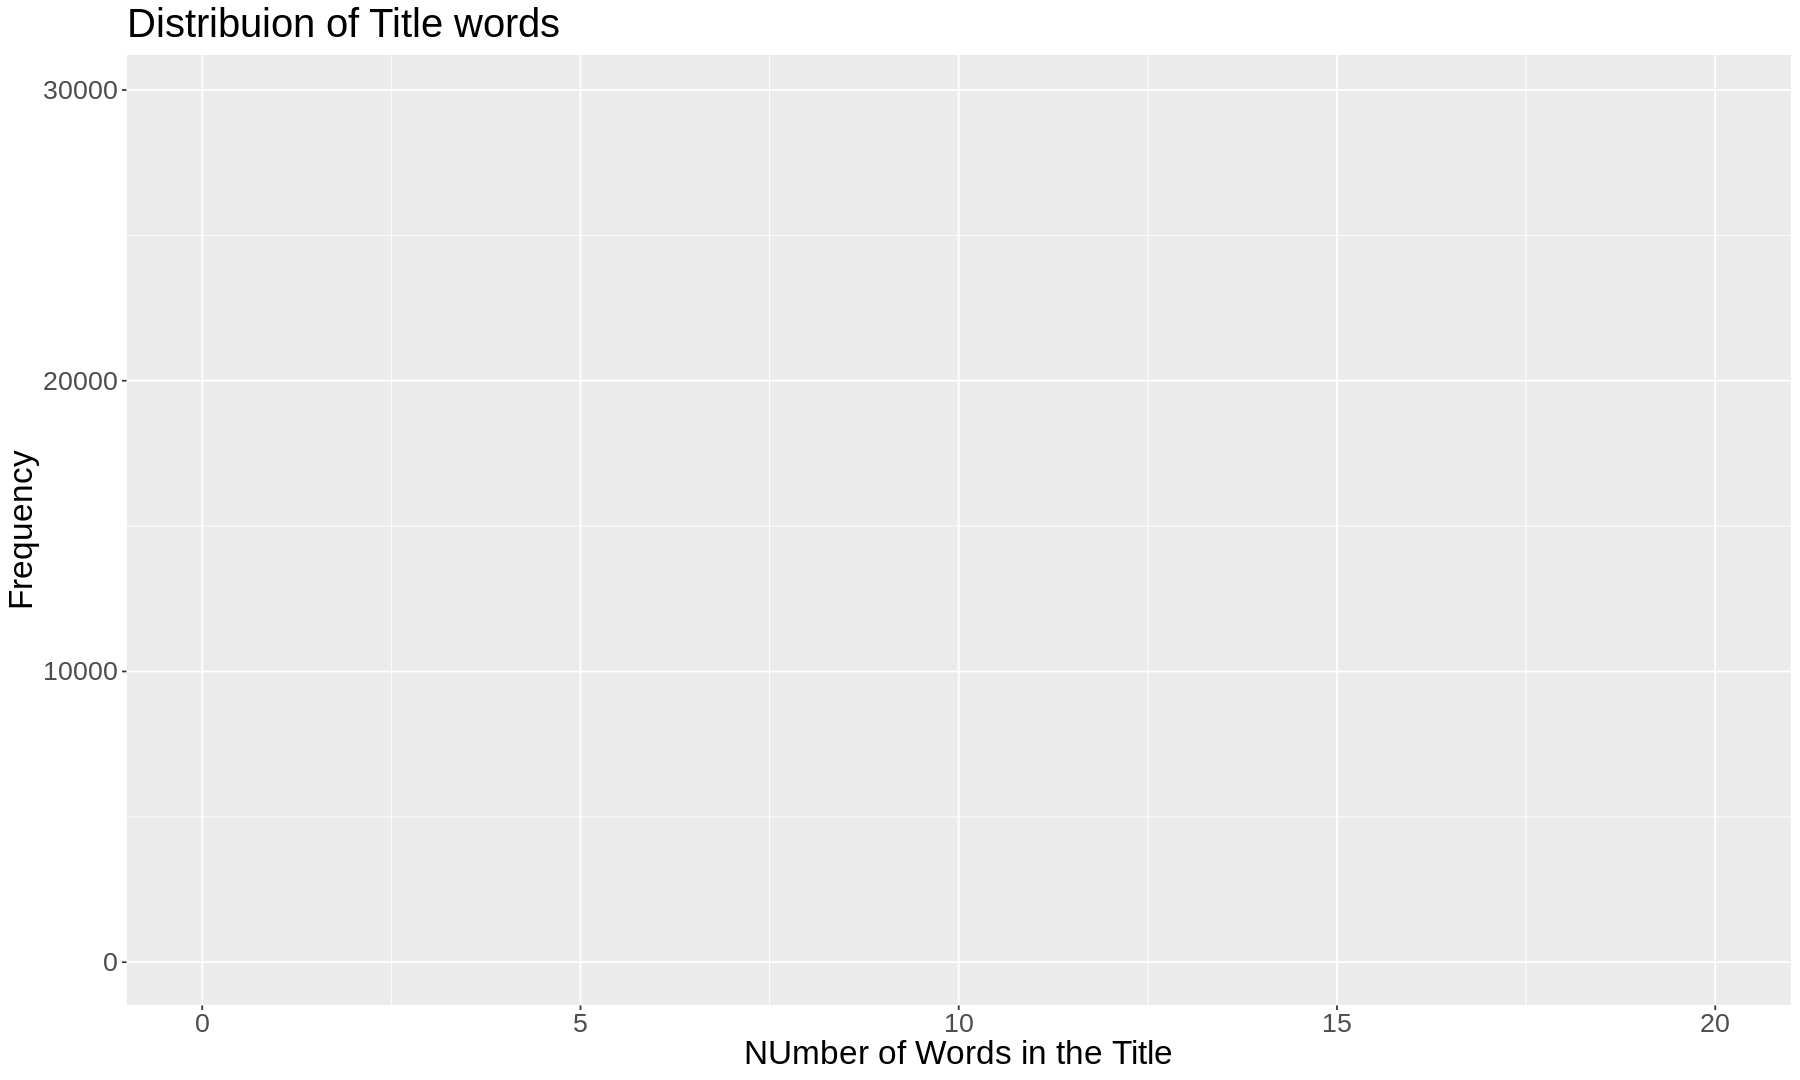

Warning message:
“Removed 2 rows containing missing values (geom_bar).”


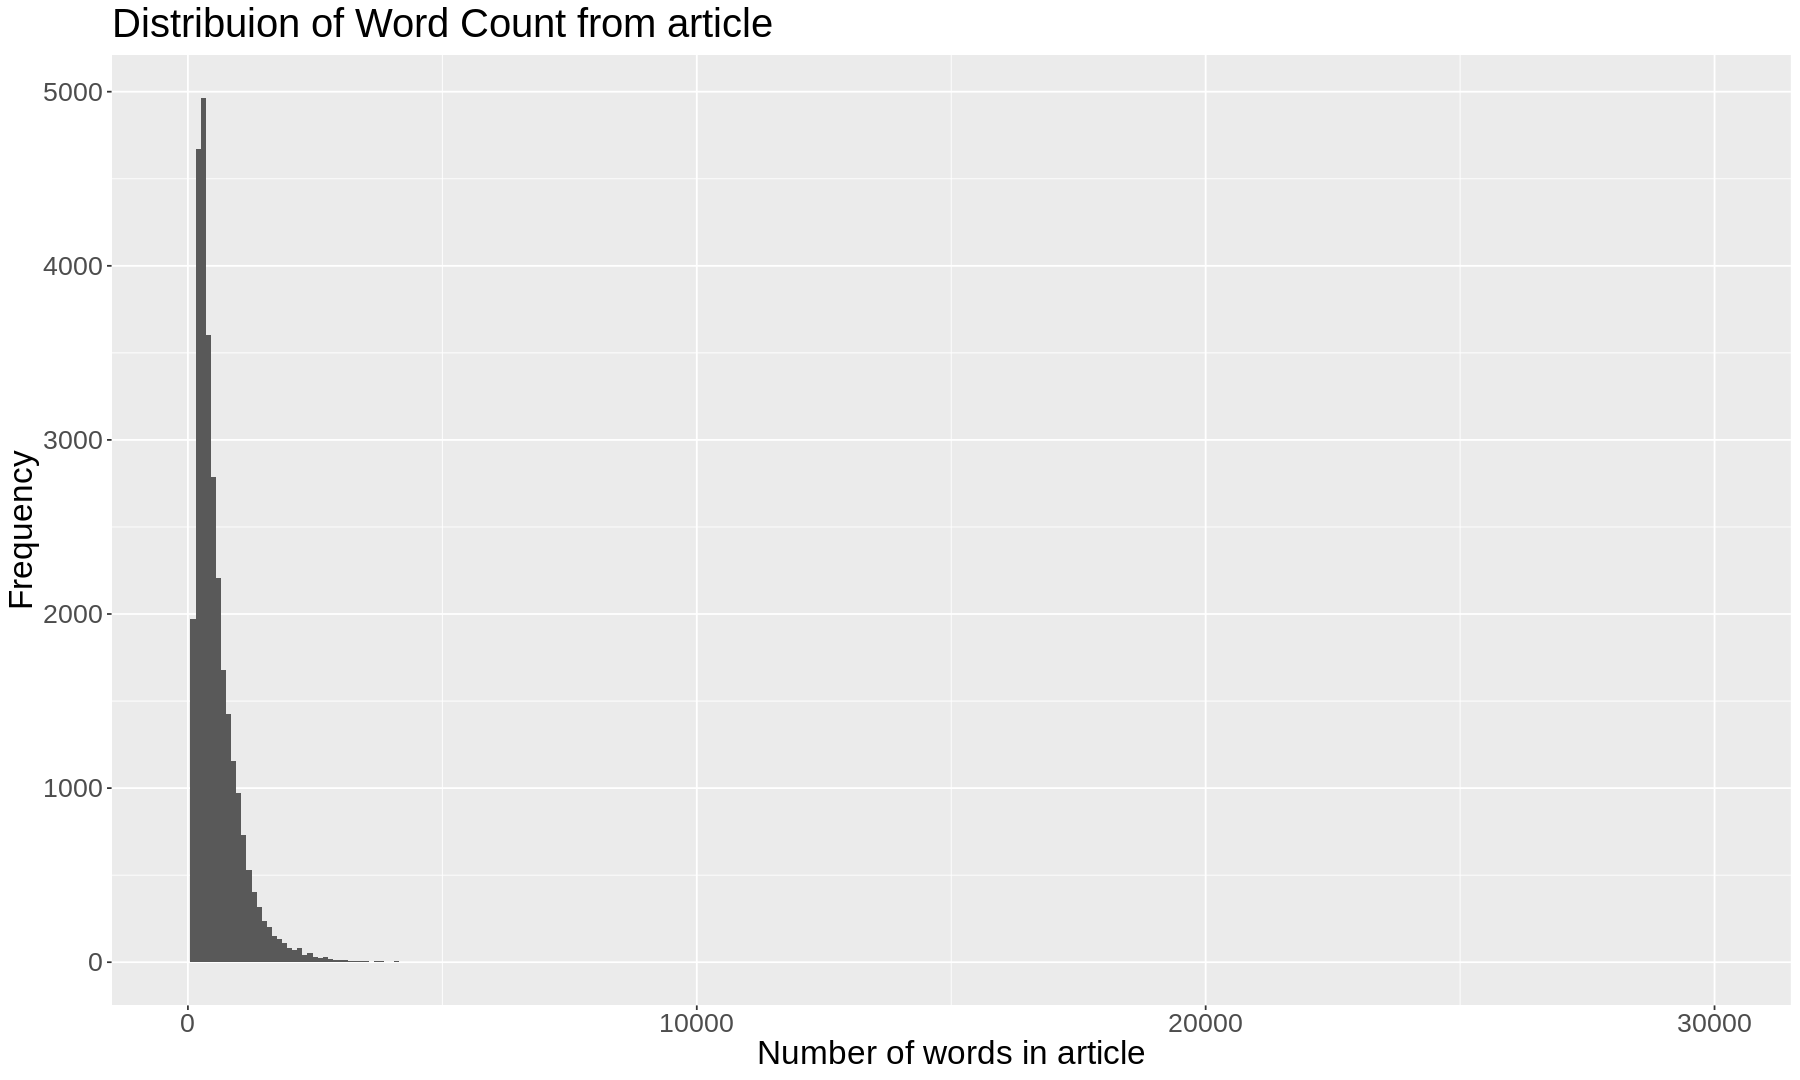

Warning message:
“Removed 2 rows containing missing values (geom_bar).”


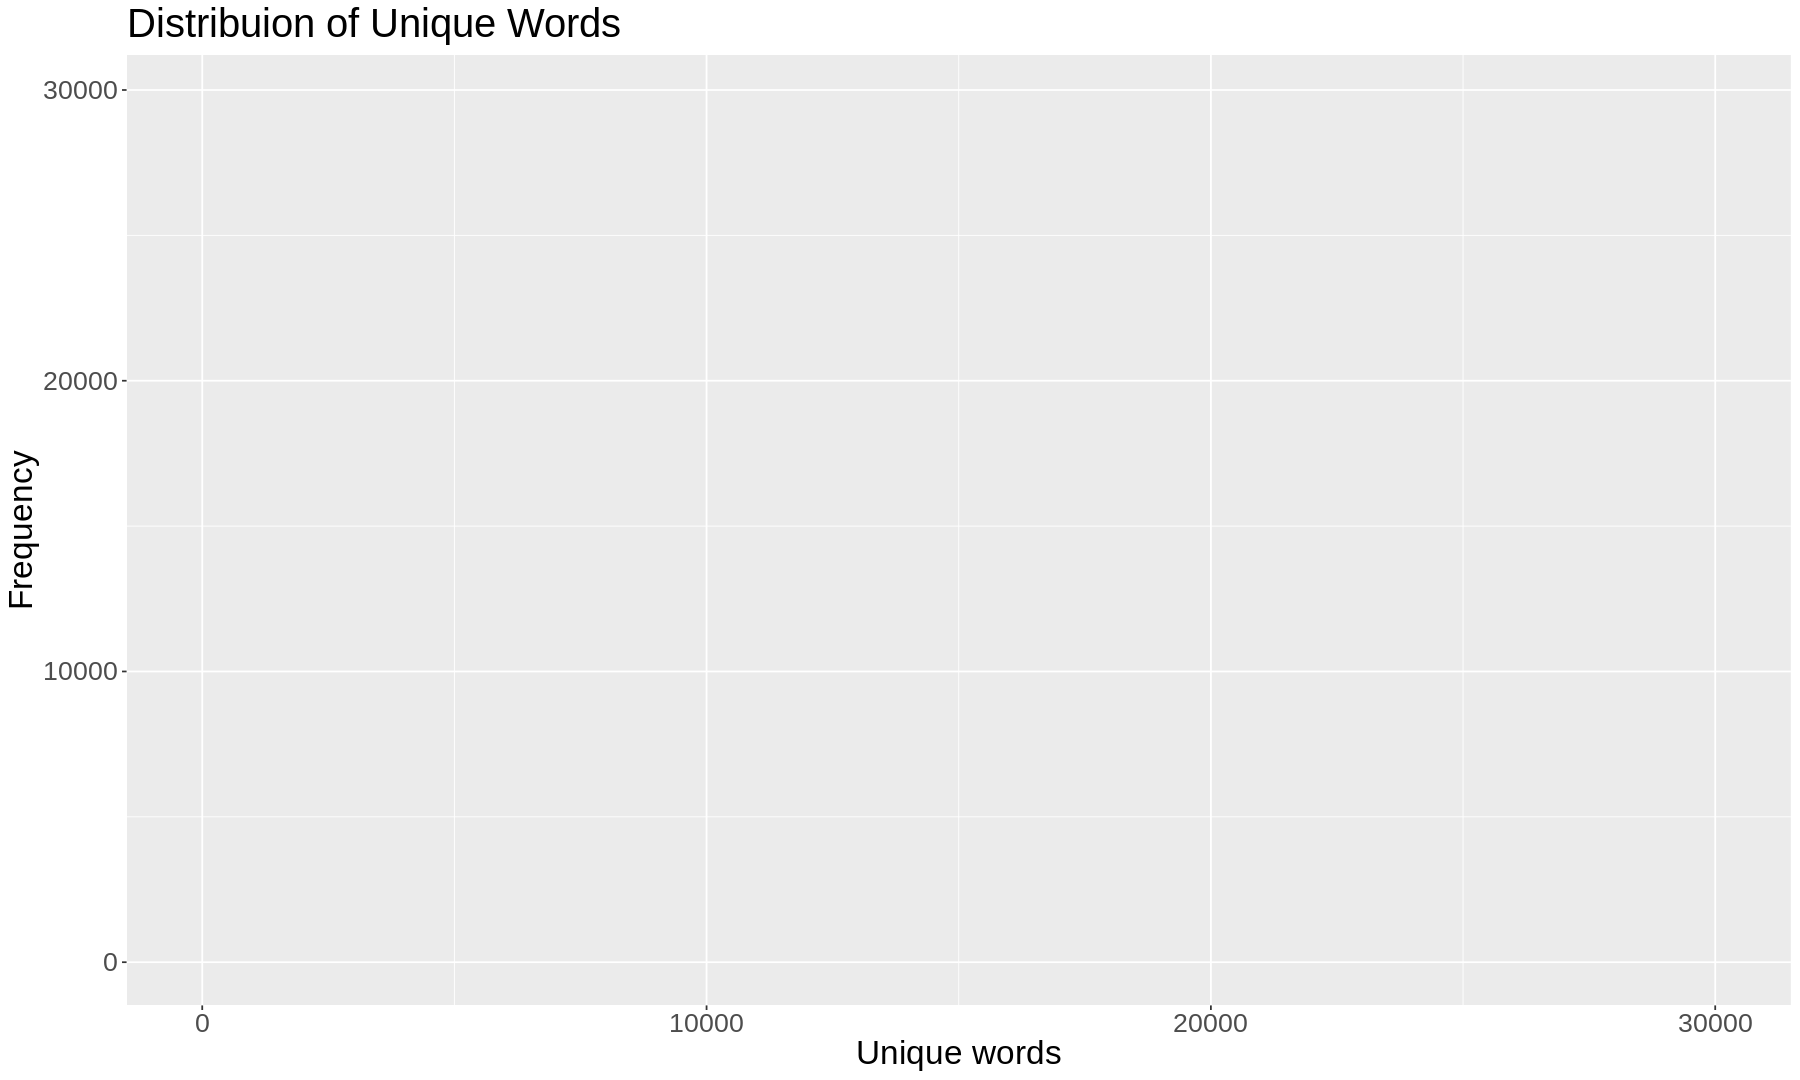

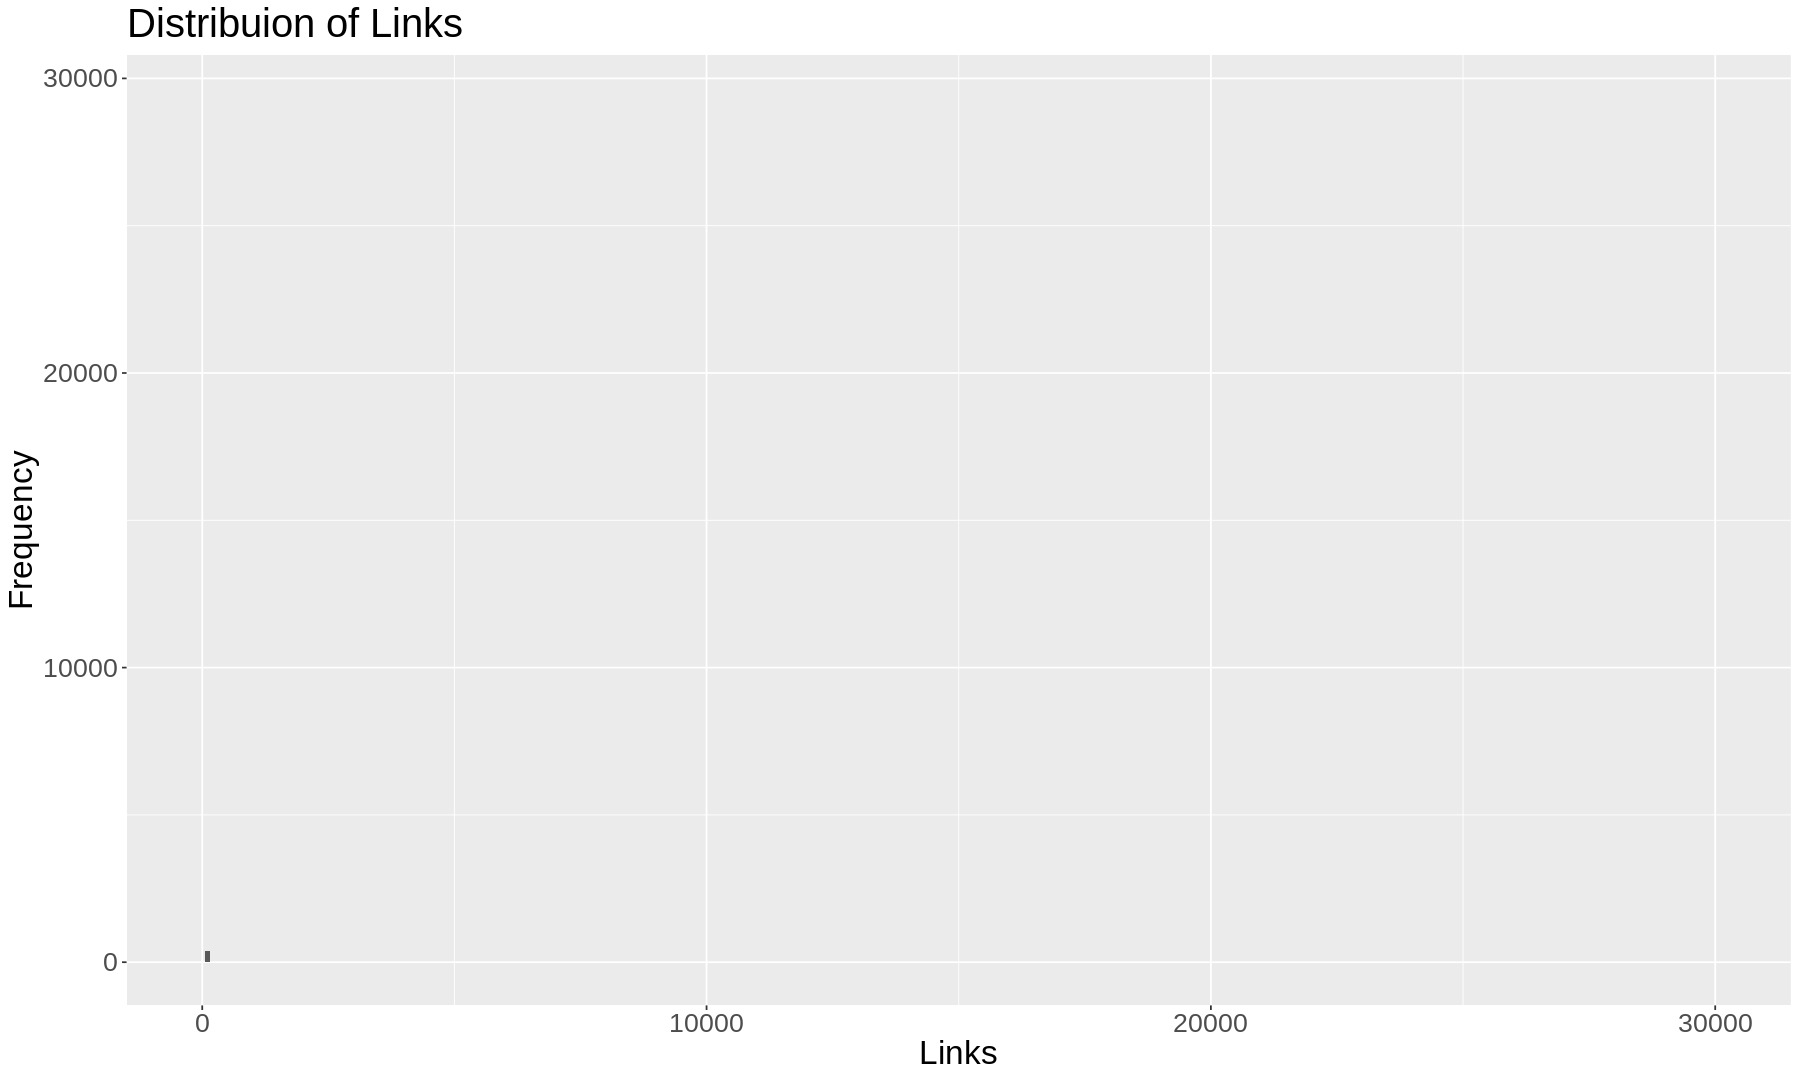

In [18]:
#I will be viewing the distribuition of shares separated by the 2 categorical variables, published day article type

options(repr.plot.width = 15, repr.plot.height =9)

shares_plot <- popularity_train |> 
ggplot(aes(x = shares)) + geom_histogram(binwidth = 100)+xlim(0,30000) +labs(x = "Shares" , y = "Frequency") +
ggtitle("Distribuion of Shares") + theme(text = element_text(size = 20))

title_words_plot <- popularity_train |> 
ggplot(aes(x = n_tokens_title)) + geom_histogram(binwidth = 100)+xlim(0,20) +labs(x = "NUmber of Words in the Title" , y = "Frequency") +
ggtitle("Distribuion of Title words") + theme(text = element_text(size = 20))

content_words_plot <- popularity_train |> 
ggplot(aes(x = n_tokens_content)) + geom_histogram(binwidth = 100)+xlim(0,30000) +labs(x = "Number of words in article" , y = "Frequency") +
ggtitle("Distribuion of Word Count from article") + theme(text = element_text(size = 20))

unique_words_plot <- popularity_train |> 
ggplot(aes(x = n_unique_tokens)) + geom_histogram(binwidth = 100)+xlim(0,30000) +labs(x = "Unique words" , y = "Frequency") +
ggtitle("Distribuion of Unique Words") + theme(text = element_text(size = 20))

links_plot <- popularity_train |>  
ggplot(aes(x = num_hrefs)) + geom_histogram(binwidth = 100)+xlim(0,30000) +labs(x = "Links" , y = "Frequency") +
ggtitle("Distribuion of Links") + theme(text = element_text(size = 20))



shares_plot
title_words_plot
content_words_plot
unique_words_plot
links_plot